# In this example, we import the data of a trajectory of an active nematic, which includes the $Q_{xx}$, $Q_{xy}$, $u_x$ and $u_y$ values at all points in space and time.

### Analysis includes:

* Visualizing the director, scalar order, flow field and vorticity
* Computing the velocity and orientation auto-correlation function in time
* Computing the flow-field divergence for a single frame, as well as averaging over all time to check incompressibility
* Finding the defect positions and orientations in a given frame, plotting the result, and computing the total number of $\pm 1/2$ defects over time.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gdown
from actnempy import ActNem

In [2]:
url = "https://drive.google.com/uc?id=1BYS1iVh9rCR_aNSnPk2qodJzDuh_2mI6"

output = "../TestData/processed_data.npz"

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1BYS1iVh9rCR_aNSnPk2qodJzDuh_2mI6
To: /home/chaitanya/git/actnempy/TestData/processed_data.npz
100%|██████████| 65.4M/65.4M [00:09<00:00, 6.63MB/s]


'../TestData/processed_data.npz'

In [3]:
an = ActNem("../TestData")

Loading all the data...
Data loaded. Dimensions: (64, 64, 499)


In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


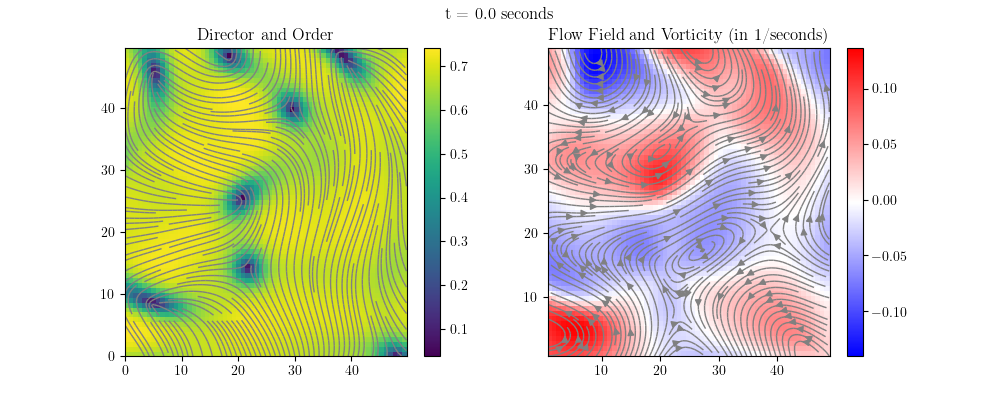

In [5]:
an.visualize(1, save=True)

### Compute the velocity autocorrelation function in time

In [6]:
vcorr, tc = an.velocity_autocorr()
print(f"Velocity autocorrelation time: {tc} units")

Velocity autocorrelation time: 39.0 units


<IPython.core.display.Javascript object>


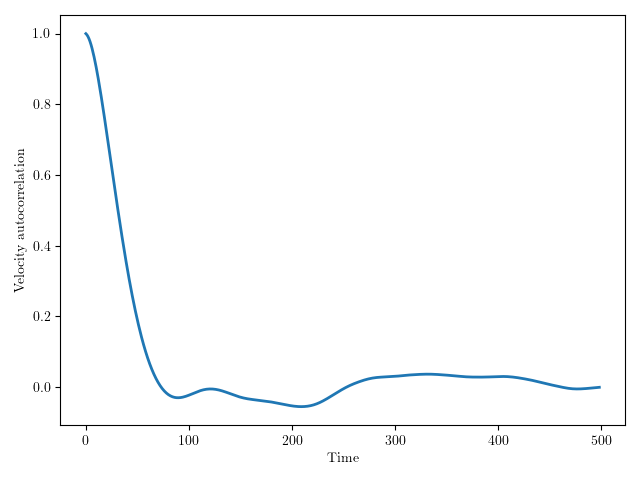

In [7]:
plt.plot(vcorr, linewidth=2)
plt.xlabel("Time")
plt.ylabel("Velocity autocorrelation")
plt.tight_layout()
plt.show()

### Compute the orientation autocorrelation function in time

Orientation autocorrelation time: 34.0 units


<IPython.core.display.Javascript object>


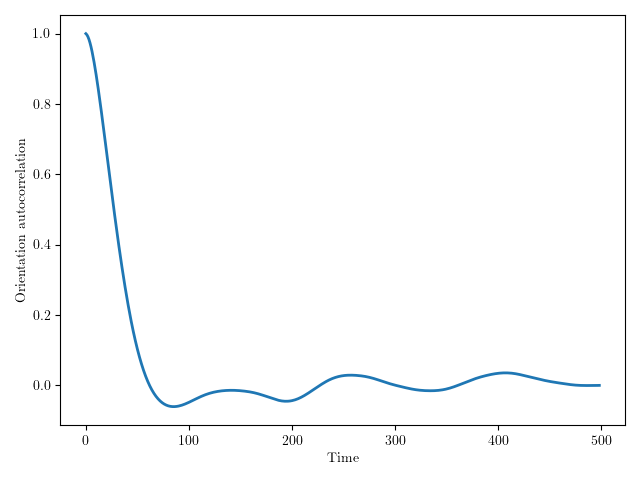

In [8]:
ocorr, tc = an.orientation_autocorr()
print(f"Orientation autocorrelation time: {tc} units")
plt.plot(ocorr, linewidth=2)
plt.xlabel("Time")
plt.ylabel("Orientation autocorrelation")
plt.tight_layout()
plt.show()

### Compute the divergence of the flow-field for a given frame 

<IPython.core.display.Javascript object>


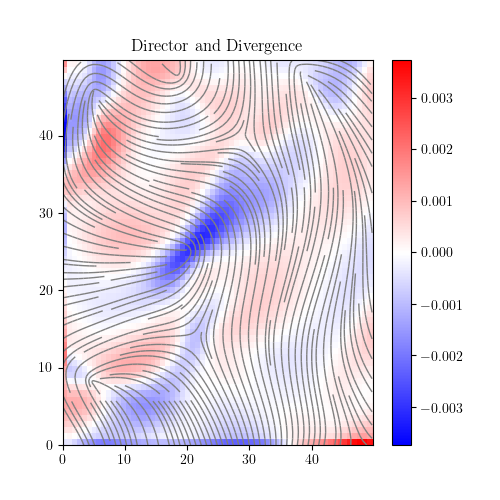

In [9]:
divu = an.compute_divergence(frame=0, plot=True, show=True)

### Check incompressibility by computing the mean and s.e.m. of the flow-field divergence

In [10]:
divu_means = an.check_imcompressibility()
print(f"Divergence of velocity: {divu_means.mean()} \u00B1 {divu_means.std()}")

Divergence of velocity: 3.6926763957677077e-06 ± 2.9355950311574833e-05


### Find the centroids and orientations of the $\pm 1/2$ defects in a given frame

<IPython.core.display.Javascript object>


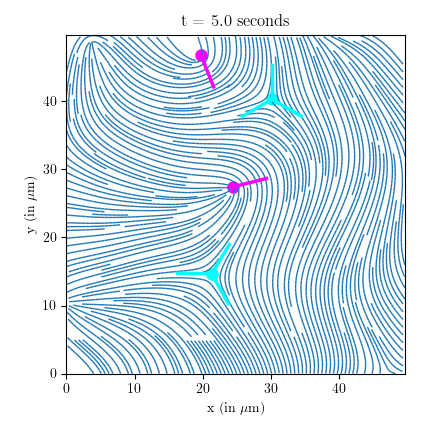

In [11]:
[cp, cm, phi_p, phi_m] = an.find_defects(frame=5, plot=True, show=True)

### Compute the time-series of the number of $\pm 1/2$ defects 

In [12]:
[num_p, num_m] = an.num_defects_all()

print(f"Number of defects per frame:: {(num_p+num_m).mean()} \u00B1 {(num_p+num_m).std()} ")

100%|██████████| 499/499 [00:01<00:00, 395.40it/s]

Number of defects per frame:: 4.270541082164328 ± 1.1711948183032883 


### Optionally delete the downloaded test dataset

In [13]:
os.remove("../TestData/processed_data.npz")